# Importamos las librerias necesarias

In [1]:
import numpy as np #PAra algebra lineal
import pandas as pd #Procesamiento de datos
import matplotlib.pyplot as plt #Graficar
import seaborn as sns #Visualizar datos
from collections import Counter

# Cargamos los datos

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Analisis exploratorio. (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Vemos si tenemos valores nulos

In [6]:
df.isnull().all()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

## Distribucion de datos

Text(0.5, 1.0, 'Distribución de Salario')

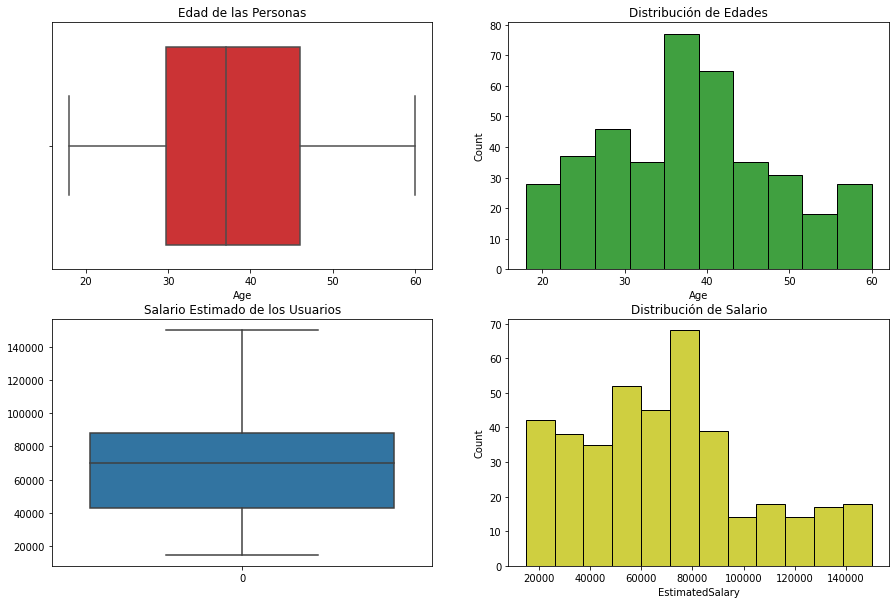

In [7]:
#Establemos una figura con 4 parcelas, organizado en 2 filas y 2 columnas

fig, axes = plt.subplots(2,2 , figsize = (15,10))

#Un diagrama de caja y bigote en la primera parcela sobre la variable AGE

sns.boxplot(ax=axes[0,0], x = df["Age"], palette = "Set1")
axes[0,0].set_title("Edad de las Personas")


sns.histplot(ax=axes[0,1], x = 'Age', data=df, color="g")
axes[0,1].set_title("Distribución de Edades")

sns.boxplot(ax=axes[1,0], data = df["EstimatedSalary"])
axes[1,0].set_title("Salario Estimado de los Usuarios")

sns.histplot(ax=axes[1,1], x = "EstimatedSalary", data=df, color= "y")
axes[1,1].set_title("Distribución de Salario")

## Comparamos entre dos variables

Text(0, 0.5, 'Cantidad')

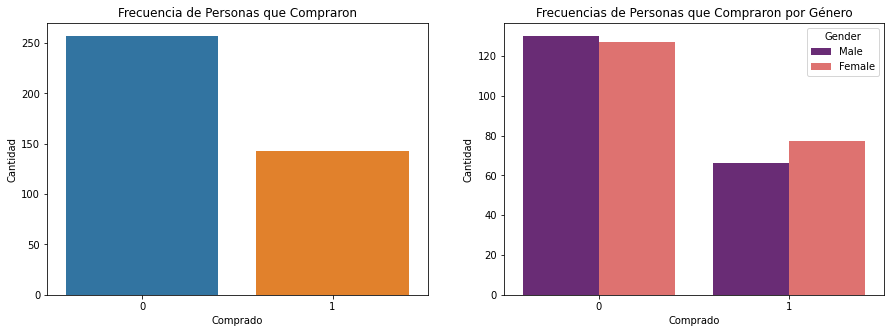

In [10]:
#Crea espacio para graficar

fig, axes = plt.subplots(1,2 , figsize = (15,5))

#Vemos la frecuencia de los valores de compra y venta

sns.countplot(ax=axes[0], x = "Purchased", data = df)
axes[0].set_title("Frecuencia de Personas que Compraron")
axes[0].set_xlabel("Comprado") 
axes[0].set_ylabel("Cantidad")

#Vemos Frecuencia de venta por genero

sns.countplot(ax=axes[1], x = "Purchased", hue = 'Gender', data = df, palette="magma")
axes[1].set_title("Frecuencias de Personas que Compraron por Género")
axes[1].set_xlabel("Comprado") 
axes[1].set_ylabel("Cantidad")



## Vemos Correlacion de variables

In [11]:
df.corr()

/var/folders/qb/0cqcyv8x37j3w9cbm4fq9dw40000gn/T/ipykernel_7243/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


## Preparar la data

In [12]:
df.drop('User ID', axis=1 , inplace = True)
label = {'Male': 0, 'Female': 1}
df["Gender"].replace(label, inplace = True)

In [13]:
#Dividimos en input/output

X = df.drop('Purchased', axis = 1)
Y = df["Purchased"]

X


,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [14]:
# Vamos a Escalar la data para pasarla al modelo

from sklearn.preprocessing import StandardScaler #Se usa para estandarizar datos


#StandardScaler escala cada caracteristica de tal manera que tenga una media de 0 y una desviación estandar de 1
#Cada caracteristica tendra una distribución normal estandar.

scaler = StandardScaler()

#La estandarizacion nos sirve porque muchos modelos asumen que las caracteristicas estan centradas alrededor de 0.
#Si las caracteristicas tienen distintos rnagos , podria ser muy snesible para el algoritmo.


#Estandirazar los datos de X y los almacenare en una variable que se llame d_scaled. 
#Ajustar y transformar los datos de una vez

d_scaled = scaler.fit_transform(X)

data_scaled1 = pd.DataFrame(d_scaled)
data_scaled1.head()

,0,1,2
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


## Empezamos con la regresion


In [15]:
from sklearn.model_selection import train_test_split

#Divide los datos en conjunto de entrenamiento y Prueba

#d_scaled Es el DF con las caracteristicas ya normalizadas

#test_size - Le indicamos que queremos un 20% de los datos para testear

#Random_state - Nos garantiza que los mismo conjuntos de entrenamiento y testeo se generan en cada corrida

X_train, X_test, y_train, y_test = train_test_split(d_scaled, Y, test_size = 0.20, random_state = 42)

In [16]:
from sklearn.linear_model import LogisticRegression

# C- controla la regularizacion del modelo, 
# Sirve para prevenir el sobreajuste del modelo al agregar una penalización a la magnitud de los coeficientes.

#Valores pequeños de C → mayor regularización.
#Valores grandes de C → menor regularización.

model = LogisticRegression(C = 0.1, max_iter = 500)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [17]:
X_test

array([[ 0.98019606,  0.79705706, -1.40195167],
       [ 0.98019606,  2.03872775,  0.53612887],
       [ 0.98019606, -0.92217926, -0.75592482],
       [ 0.98019606,  0.98808332,  0.77104772],
       [ 0.98019606, -0.82666613, -1.22576253],
       [ 0.98019606, -0.73115301, -0.2273574 ],
       [ 0.98019606,  0.89257019,  1.09406114],
       [ 0.98019606, -0.82666613,  0.38930459],
       [-1.02020406,  0.22397829,  0.15438573],
       [-1.02020406,  0.41500455, -0.13926283],
       [ 0.98019606, -0.25358736, -0.13926283],
       [ 0.98019606,  1.46564897, -1.04957339],
       [ 0.98019606, -1.39974491, -0.63846539],
       [ 0.98019606, -1.6862843 , -1.37258681],
       [-1.02020406, -0.73115301,  0.50676401],
       [-1.02020406, -0.25358736,  1.123426  ],
       [ 0.98019606,  1.37013584, -0.93211396],
       [ 0.98019606,  0.79705706,  0.12502088],
       [-1.02020406,  0.12846516, -0.81465453],
       [-1.02020406,  1.75218836, -0.28608712],
       [ 0.98019606, -1.49525804, -1.255

In [18]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [19]:
predicted_proba = model.predict_proba(X_test)

positive_proba = predicted_proba[:, 1]
positive_proba

array([0.28230329, 0.91136465, 0.05672128, 0.7418995 , 0.04517357,
       0.10655563, 0.76480919, 0.14552103, 0.40820491, 0.41613435,
       0.19900437, 0.56857159, 0.03286011, 0.01258356, 0.19466449,
       0.43366651, 0.55881972, 0.56903541, 0.21879479, 0.80284373,
       0.01791677, 0.15241255, 0.34237243, 0.88604407, 0.0113803 ,
       0.46965719, 0.50266471, 0.2171855 , 0.93467679, 0.01053896,
       0.37975436, 0.03637811, 0.6691337 , 0.1333225 , 0.59238374,
       0.26203564, 0.22520843, 0.27010017, 0.03631187, 0.02711061,
       0.42872531, 0.04367749, 0.0212749 , 0.32681983, 0.02575642,
       0.82142537, 0.10356028, 0.14380757, 0.47483407, 0.115304  ,
       0.09361189, 0.80120696, 0.22670771, 0.09560664, 0.31483792,
       0.03744339, 0.94850895, 0.20529848, 0.16939485, 0.1760494 ,
       0.28460478, 0.17096074, 0.80959105, 0.14065945, 0.08805178,
       0.31470305, 0.52979154, 0.8850238 , 0.26873733, 0.36811574,
       0.92858702, 0.0508151 , 0.07629742, 0.01964834, 0.40213

In [20]:
print('Weight Coefficient : ', model.coef_)
print('Bias : ', model.intercept_)
      
#y = B + w1 * C1 + w2 * C2 + ...

#y = -0.8686142 + -0.06210386 * Genero + 1.39043467 *  Age + 0.79306064 * Estimated Salary


Weight Coefficient :  [[-0.06210386  1.39043467  0.79306064]]
Bias :  [-0.8686142]


## Resultados de la prediccion

In [21]:
print('Test accuracy: ', model.score(X_test, y_test))
print('Train accuracy: ', model.score(X_train, y_train))

Test accuracy:  0.8625
Train accuracy:  0.8125


## Aplicamos Matriz de confusion

In [30]:
from sklearn.metrics import confusion_matrix

df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Venta', 'No Venta'],
                 index= ['Venta Verdadera', 'No Venta Verdadera'])

df

,Venta,No Venta
Venta Verdadera,50,2
No Venta Verdadera,9,19


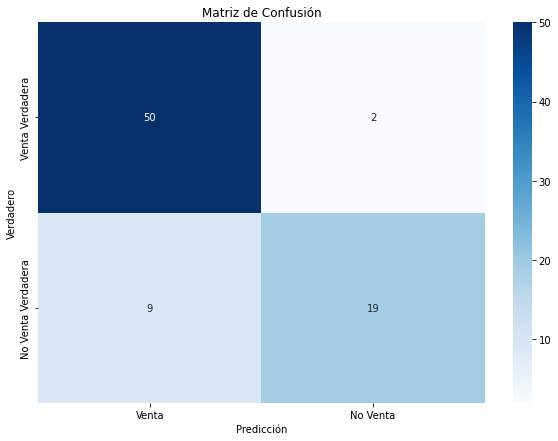

In [31]:
plt.figure(figsize=(10, 7))
sns.heatmap(df, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score, precision_score

print("Accuracy : ", accuracy_score(y_test, y_pred) )


Accuracy :  0.8625


In [24]:
final_prov = model.predict_proba(data_scaled1)

final_positiv_proba = final_prov[:,1]
final_positiv_proba




array([0.0113803 , 0.08978514, 0.04310272, 0.06652901, 0.04160646,
       0.07629742, 0.1178975 , 0.54699749, 0.03417252, 0.19900437,
       0.09635042, 0.05262434, 0.05889396, 0.05945433, 0.04188343,
       0.15241255, 0.35293487, 0.2997508 , 0.33869754, 0.37649811,
       0.28056974, 0.45723442, 0.47483407, 0.25618932, 0.31312617,
       0.32681983, 0.43273782, 0.35115744, 0.07060301, 0.05244816,
       0.16939485, 0.31470305, 0.01221364, 0.05672128, 0.14823252,
       0.10402844, 0.07448184, 0.0907155 , 0.08130439, 0.03744339,
       0.02731043, 0.12087482, 0.43366651, 0.04324253, 0.13242472,
       0.01964834, 0.09361189, 0.06231943, 0.42503147, 0.20345592,
       0.02603614, 0.01568471, 0.14552103, 0.08543995, 0.06798996,
       0.04367749, 0.03286011, 0.1333225 , 0.01647499, 0.35894153,
       0.03296784, 0.11066117, 0.04913045, 0.40471329, 0.90149718,
       0.05254222, 0.02187268, 0.06976609, 0.04048226, 0.13541758,
       0.09560664, 0.02324083, 0.01258356, 0.36811574, 0.05945

In [25]:
final_tags = model.predict(data_scaled1)
final_tags

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,

# Agregamos las columnas a nuestro DF Original

In [34]:
df = pd.read_csv("Social_Network_Ads.csv")

In [35]:
df["Prediction"] = final_tags
df["Prediction_proba"] = final_positiv_proba

In [36]:
df.tail(10)

,User ID,Gender,Age,EstimatedSalary,Purchased,Prediction,Prediction_proba
390,15807837,Male,48,33000,1,0,0.428725
391,15592570,Male,47,23000,1,0,0.342372
392,15748589,Female,45,45000,1,0,0.370460
393,15635893,Male,60,42000,1,1,0.819978
394,15757632,Female,39,59000,0,0,0.268737
395,15691863,Female,46,41000,1,0,0.379754
396,15706071,Male,51,23000,1,0,0.469657
397,15654296,Female,50,20000,1,0,0.389736
398,15755018,Male,36,33000,0,0,0.132307
399,15594041,Female,49,36000,1,0,0.448034


In [37]:
df_sorted = df.sort_values(by='Prediction_proba', ascending=False)
# Dividimos los datos en deciles
df_sorted['Decile'] = pd.qcut(df_sorted['Prediction_proba'], 10, labels=False)

In [38]:
df_sorted.to_csv("NetworkFinalDecil.csv")